<a href="https://colab.research.google.com/github/leikcaro/PCA-en-MINST/blob/main/MNIST_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# cargar el conjunto de datos
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# ver la forma del conjunto de datos
mnist.data.shape



(70000, 784)

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression

In [ ]:
#los tipo BUNCH son subtipos de diccionarios, los datos de sklearn vienen en este tipo de datos. Dejaré los principales metodos de Bunch
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
mnist.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [ ]:
mnist.target_names

['class']

In [ ]:
X=mnist.data

In [ ]:
y=mnist.target

In [ ]:
# Instantiar Escalador Estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(X)

In [ ]:
# Instanciar y ajustar datos usando PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

Text(0, 0.5, 'Proportion of Explained Variance')

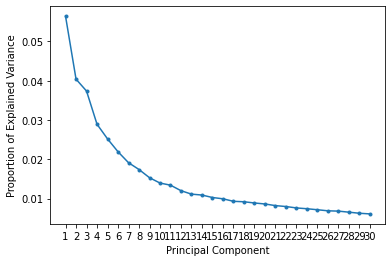

In [ ]:
# Graficar los ratios de varianza explicadas de los primeros 10 componentes principales
plt.plot(range(1, 31), pca.explained_variance_ratio_[:30], marker = '.')
plt.xticks(ticks = range(1, 31))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [ ]:
#podemos observar que la varianza tiene un componente relativamente homogeneno en las variables, por lo que será dificil elegir X componentes, 
#mejor ponemos el prcentaje de varianza a conservar, de todos modos me decantaria por 11

#investigando, otra forma es dejar el n_components entre 0 y 1, en este caso 0.95 y automanticamente se calcula la cantidad de features a dejar

In [ ]:
pca2=PCA(n_components=0.95)

In [ ]:
X_2= pca2.fit_transform(X)

In [ ]:
X_2.shape #pasamos de 784 a solo 154 dimensiones con una perdida de varianza de solo 0.05

(70000, 154)